In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [ ]:

x_train = np.array([1.0, 2.0])   # Features
y_train = np.array([300.0, 500.0])  # Target values

In [ ]:

def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost = 0
    for i in range(m):
        f_wb = w * x[i] + b
        cost += (f_wb - y[i])**2
    return cost / (2 * m)

In [ ]:

def compute_gradient(x, y, w, b):
    m = x.shape[0]
    dj_dw, dj_db = 0, 0
    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw += (f_wb - y[i]) * x[i]
        dj_db += (f_wb - y[i])
    return dj_dw / m, dj_db / m

In [ ]:

def gradient_descent(x, y, w_in, b_in, alpha, num_iters):
    J_history, p_history = [], []
    w, b = w_in, b_in
    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db
        J_history.append(compute_cost(x, y, w, b))
        p_history.append([w, b])
        if i % (num_iters // 10) == 0:
            print(f"Iteration {i}: Cost {J_history[-1]:.2f}, w: {w:.3f}, b: {b:.3f}")
    return w, b, J_history, p_history

In [ ]:

w_init, b_init = 0, 0
iterations = 10000
alpha = 0.01
w_final, b_final, J_hist, p_hist = gradient_descent(x_train, y_train, w_init, b_init, alpha, iterations)

Iteration 0: Cost 79274.81, w: 6.500, b: 4.000
Iteration 1000: Cost 3.41, w: 194.915, b: 108.228
Iteration 2000: Cost 0.79, w: 197.549, b: 103.966
Iteration 3000: Cost 0.18, w: 198.818, b: 101.912
Iteration 4000: Cost 0.04, w: 199.430, b: 100.922
Iteration 5000: Cost 0.01, w: 199.725, b: 100.444
Iteration 6000: Cost 0.00, w: 199.868, b: 100.214
Iteration 7000: Cost 0.00, w: 199.936, b: 100.103
Iteration 8000: Cost 0.00, w: 199.969, b: 100.050
Iteration 9000: Cost 0.00, w: 199.985, b: 100.024


In [7]:
w_final, b_final

(199.99285075131766, 100.011567727362)

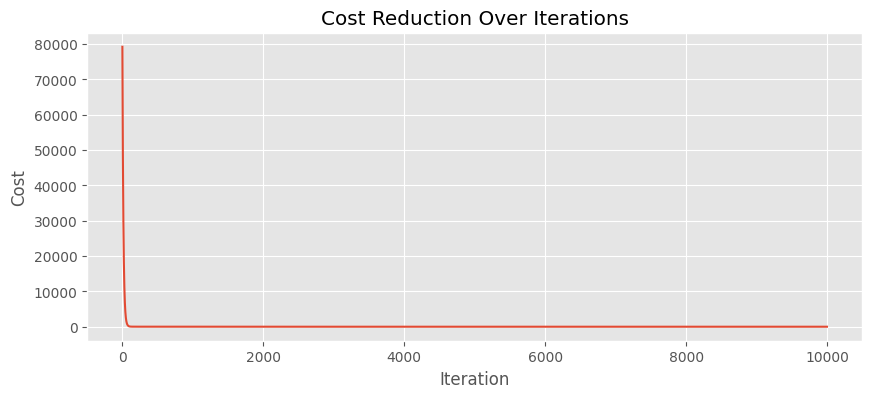

In [ ]:

plt.figure(figsize=(10, 4))
plt.plot(J_hist)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost Reduction Over Iterations")
plt.show()

In [ ]:

print(f"Prediction for 1000 sqft: ${w_final * 1.0 + b_final:.2f}K")
print(f"Prediction for 1200 sqft: ${w_final * 1.2 + b_final:.2f}K")
print(f"Prediction for 2000 sqft: ${w_final * 2.0 + b_final:.2f}K")

Prediction for 1000 sqft: $300.00K
Prediction for 1200 sqft: $340.00K
Prediction for 2000 sqft: $500.00K


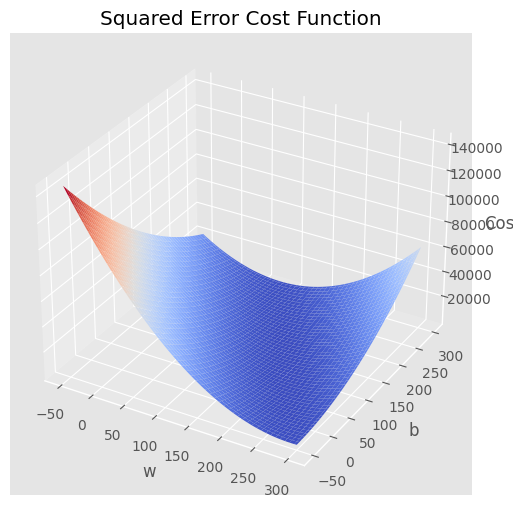

In [ ]:

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

w_range = np.linspace(-50, 300, 100)
b_range = np.linspace(-50, 300, 100)
J_vals = np.zeros((len(w_range), len(b_range)))

for i in range(len(w_range)):
    for j in range(len(b_range)):
        J_vals[i, j] = compute_cost(x_train, y_train, w_range[i], b_range[j])

W, B = np.meshgrid(w_range, b_range)
ax.plot_surface(W, B, J_vals.T, cmap='coolwarm')
ax.set_xlabel("w")
ax.set_ylabel("b")
ax.set_zlabel("Cost")
ax.set_title("Squared Error Cost Function")
plt.show()
